#Your Healing Place

#1. Opening
Bestieeeeee, lagi pusing banget ga sih? Baru juga WFO, eh pas akhir tahun. Mana lagi banyak kerjaan dan ga boleh cuti lagi! PPKM Level 3 juga diberlakukan kembali! TBL TBL TBL TBL! AAAAMMMBYAAARRRR SUDAH RENCANA UNTUK HEALING! PENGEN BANGET JALAN-JALAN BESTIEEEEEE!!!!!
Sabar Bestieeeee! SAVE dulu jalan-jalannya bestieeee! Kamu bisa jalan-jalan ke Yogya Istimewa! Ada banyak alasan mengapa Yogya jadi pilihan liburan kamu! Mulai dari kulinernya yang nikmat, biayanya yang murah, hingga objek wisatanya yang selalu baru, unik, dan menyajikan pemandangan yang memukau. Nah, untuk kamu yang berencana untuk menghabiskan liburan di Kota Yogya dan mencari lokasi wisata dengan pemandangan yang paling indah! Cekidot dong!

##1.1. Content
Dataset ini merupakan dataset yang berisi beberapa tempat wisata di 5 kota besar di Indonesia yaitu Jakarta, Yogyakarta, Semarang, Bandung, Surabaya. Dataset ini digunakan di Capstone Project Bangkit Academy 2021 yang disebut GetLoc. GetLoc sebagai aplikasi yang mampu merekomendasikan beberapa destinasi wisata menurut pengguna, apa yang disukai pengguna, dan beberapa parameter seperti kota, harga, kategori, dan juga waktu. Selain itu, GetLoc juga mampu memberikan rute tercepat dan termurah dalam mengunjungi tempat-tempat tersebut, sehingga pengalaman perjalanan Anda akan semakin menarik. Anda dapat melihat repositori di sini. Dataset ini juga terdiri dari 4 file, yaitu:
1. tourism_ dengan _id.csv yang berisi informasi tempat wisata di 5 kota besar di Indonesia berjumlah ~400
2. user.csv yang berisi data pengguna dummy untuk membuat fitur rekomendasi berdasarkan pengguna
3. tourism_rating.csv berisi 3 kolom yaitu user, place, dan rating yang diberikan, berfungsi untuk membuat sistem rekomendasi berdasarkan rating
4. package_tourism.csv berisi rekomendasi tempat terdekat berdasarkan waktu, biaya, dan rating.

##1.2. Source
https://www.kaggle.com/aprabowo/indonesia-tourism-destination

#2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pertama yang kita lakukan adalah import pandas, numpy, seaborn, dan matplotlib sebagai dasar untuk mengetahui seberapa banyak tempat liburan di Yogyakarta. Kemudian kita dapat melakukan permodelan menggunakan tensorflow juga Machine Learning (ML) terkait rekomendasi liburan di Yogyakarta.

In [ ]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

#3. Dataset Preparation

Langkah selanjutnya, kita menyiapkan data. sesuai dengan ketersediaan data yang ada, kita menggunakan data rating wisata, data wisata dengan id, dan data pengguna.

In [ ]:
df_rating = pd.read_csv('/content/drive/MyDrive/Final Project/tourism_rating.csv')
df_id = pd.read_csv('/content/drive/MyDrive/Final Project/tourism_with_id.csv')
df_user = pd.read_csv('/content/drive/MyDrive/Final Project/user.csv')

#4. Feature Selection

##4.1. Tourism with ID

Selanjutnya, kita dapat melihat data secara detail, memilih data mana saja yang akan diambil oleh kita, dan membuang data yang kosong atau null.

In [ ]:
df_id.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
#Remove unused Coloumn
df_id = df_id.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
df_id.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


Karena data tourism_id terdapat 5 Kota di Indonesia. Kita akan mengambil Kota Yogyakarta menjadi pilihan.

In [ ]:
#Change data only Yogyakarta

df_id = df_id[df_id['City']=='Yogyakarta']
df_id.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,NaN,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144


In [ ]:
df_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 84 to 209
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      126 non-null    int64  
 1   Place_Name    126 non-null    object 
 2   Description   126 non-null    object 
 3   Category      126 non-null    object 
 4   City          126 non-null    object 
 5   Price         126 non-null    int64  
 6   Rating        126 non-null    float64
 7   Time_Minutes  60 non-null     float64
 8   Coordinate    126 non-null    object 
 9   Lat           126 non-null    float64
 10  Long          126 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.8+ KB


In [ ]:
# Remove unused coloumn
df_id = df_id.drop('Time_Minutes', axis=1)

##4.2. Tourism Rating

Kita akan melakukan hal yang sama seperti data tourism_id kepada data tourism rating.

In [ ]:
df_rating.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
df_rating.info

<bound method DataFrame.info of       User_Id  Place_Id  Place_Ratings
0           1       179              3
1           1       344              2
2           1         5              5
3           1       373              3
4           1       101              4
...       ...       ...            ...
9995      300       425              2
9996      300        64              4
9997      300       311              3
9998      300       279              4
9999      300       163              2

[10000 rows x 3 columns]>

In [ ]:
#Changing Data Rating only tourism for Yogyakarta
df_rating = pd.merge(df_rating, df_id[['Place_Id']], how='right', on='Place_Id')
df_rating.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


In [ ]:
#looking Dataset Tourism for Yogyakarta
df_rating.shape

(2871, 3)

##4.3. Tourism User

Begitupula dengan data tourism_user, kita akan melihat data mana yang penting untuk digunakan dan yang akan dibuang.

In [ ]:
df_user.head(5)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
#Changing data user only for visitor whos visit Yogyakarta

df_user = pd.merge(df_user, df_rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
df_user.head()

,User_Id,Location,Age
868,1,"Semarang, Jawa Tengah",20
0,2,"Bekasi, Jawa Barat",21
247,3,"Cirebon, Jawa Barat",23
621,4,"Bekasi, Jawa Barat",21
2649,5,"Lampung, Sumatera Selatan",20


# 5. Exploratory Data Analysis

Selanjutnya kita akan melakukan exploratory data anaysis (EDA) sebagai bagian dari data apa saja yang akan digunakan dan dikembangkan. EDA yang akan digunakan adalah melihat jumat tempat wisata dengan rating terbanyak, lalu kategori tempat wisata, umur, harga wisata, dan asal wisatawan.

Pertama, kita lakukan EDA terkiat jumlah tempat wisata dengan rating terbanyak di Yogyakarta.

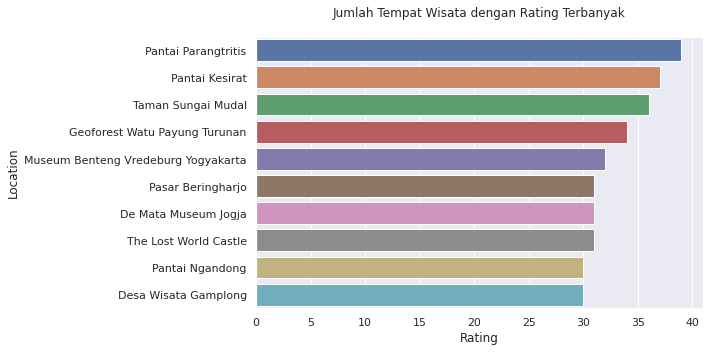

In [ ]:
#Create Data Frame based on location within highest rating
top_10 = df_rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, df_id[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

#Create data visualization tourism within highest rating
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Location')
plt.xlabel('Rating')
plt.show()

Hasilnya, Pantai Parangtritis masih menjadi tempat wisata yang paling diminati di Yogyakarta. Kemudian, diikuti oleh Pantai Kesirat, Taman Sungai Mudal dan Geoforest Watu Payung Turunan. Kalau dilihat tiga besar, sepertinya wisata alam mempunyai ketertarikan sendiri yaa.

Selanjutnya kita melakukan EDA terhadap kategori wisata mana yang paling banyak dikunjungi oleh para wisatawan.

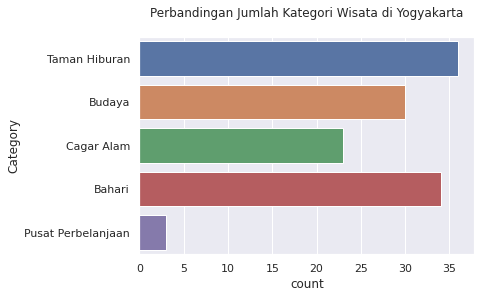

In [ ]:
#Create Data Visualization within Total Tourism in Yogyakarta
sns.countplot(y='Category', data=df_id)
plt.title('Perbandingan Jumlah Kategori Wisata di Yogyakarta', pad=20)
plt.show()

Hasilnya, tempat taman hiburan paling diminati bisa jadi referensi kamu juga nih untuk datang kesana sambil menikmati obrolan bersama keluarga, teman atau pasangan kamu. selain itu, Yogyakarta memang tidak jauh dari unsur kebudayaan jawa yang kental. ini nih yang bisa jadi daya pikat menarik bagi wisatawan.

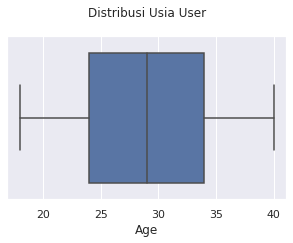

In [ ]:
#Create Data Visualization Age Distribution
plt.figure(figsize=(5,3))
sns.boxplot(df_user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

dari data user, kita dapat mengetahui jumlah usia para wisatawan. Ternyata, paling banyak usia yang datang ke Yogyakarta dari umur 25 tahun hingga 35 tahun. Ternyata kebanyakan yang datang adalah anak muda beserta teman dan pasangannya.

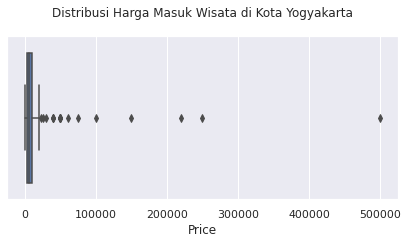

In [ ]:
#Creating Data Visualization Price Distribution for enter tourism

plt.figure(figsize=(7,3))
sns.boxplot(df_id['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Yogyakarta', pad=20)
plt.show()

Siapa bilang liburan ke Yogya harus mahal? Ternyata enggak juga kok. Buktinya Liburan Ke Yogya kamu cukup mengeluarkan Rp 100.000 - Rp 250.000. Wah udah pasti hemat banget plus kamu sangat refreshing.

Ternyata, wisatawan yang seringkali datang ke Yogyakarta paling banyak berasal dari Bekasi, Semarang, dan Lampung.

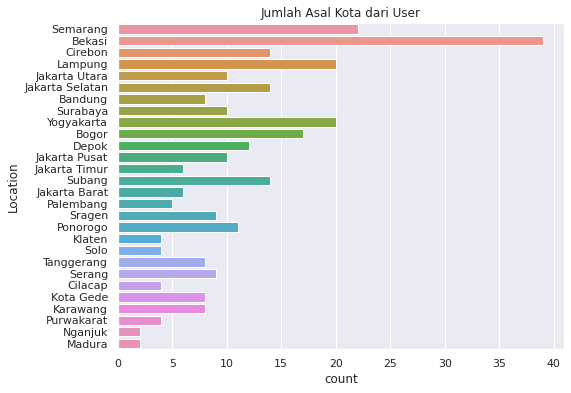

In [ ]:
#Filtering Domicili User
askot = df_user['Location'].apply(lambda x : x.split(',')[0])

# Data Visualization Domicili User
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

#6. Modeling Preparation

Setelah kita melakukan EDA, sekarang kita dapat melakukan Suprvised Machine Learning (ML) untuk membuat rekomendasi wisata di Yogyakarta. Pertama kali yang akan kita lakukan adalah melakukan modeling dengan penggandaan data df_rating sebagai dasar dataset.

##6.1. Copy Modeling

In [ ]:
#Dataset for encoding
rating = df_rating.copy()
rating.head()

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4


##6.2. Encoding

Setelah melakukan penggandaan data df_rating kita dapat mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama kemudian melakukan encoding value kolom suatu dataframe ke angka dan melakukan enconding angka ke value dari kolom suatu dataframe

In [ ]:
def dict_encoder(col, data=rating):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

Kemudian melakukan encoding user_id dan melakukan mapping user_id sebagai rujukan data dari rekomendasi wisata di Yogyakarta

In [ ]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
rating['user'] = rating['User_Id'].map(user_to_user_encoded)

Lakukan yang sama untuk tempat rekomendasi.

In [ ]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
rating['place'] = rating['Place_Id'].map(place_to_place_encoded)

##6.3. Visualize Modeling

Selanjutnya, kita dapat melakukan modelling untuk data visualisasi berdasarkan jumlah user dan tempat, kemudiang mengubah data rating menjadi float. dan mendapatkan nilai minimun dan maksimum.

In [ ]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# Mengubah rating menjadi nilai float
rating['Place_Ratings'] = rating['Place_Ratings'].values.astype(np.float32)
 
# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(rating['Place_Ratings']), max(rating['Place_Ratings'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 126, Min Rating: 1.0, Max Rating: 5.0


Kemudian, kita dapat melakukan cek data yang kita inginkan apakah sudah sesuai, dengan cara melakukan pengacakan terhadap rating.

In [ ]:
# Mengacak dataset
rating = rating.sample(frac=1, random_state=42)
rating.head(5)

,User_Id,Place_Id,Place_Ratings,user,place
729,194,115,4.0,130,30
2067,276,176,2.0,23,91
1288,197,142,5.0,148,57
1738,247,162,3.0,20,77
2078,109,177,2.0,31,92


#7. Modeling With Machine Learning

Jika semua sudah sesuai saatnya kita melakukan modelling untuk Machine Learning. Dengan cara mengabungkan data user dengan place menjadi satu value.

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = rating[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = rating['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

##7.1. Preparing Model

Saatnya melakukan modelling dengan menggunakan rekomendasi net.

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

##7.2. Inisiasi Model

selanjutnya, kita dapat melakukan inisiasi model

In [ ]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

##7.3. Inisiasi Callback

lalu melakukan callback agar metriks validasi sudah sesuai harapan.

In [ ]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

## 7.4. Proses Training

saatnya, melakukan training terhadap modelling.

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
72/72 [==============================] - 1s 5ms/step - loss: 0.7103 - root_mean_squared_error: 0.3628 - val_loss: 0.6988 - val_root_mean_squared_error: 0.3450
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.7090 - root_mean_squared_error: 0.3618 - val_loss: 0.6985 - val_root_mean_squared_error: 0.3448
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 0.7111 - root_mean_squared_error: 0.3633 - val_loss: 0.6992 - val_root_mean_squared_error: 0.3453
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.7110 - root_mean_squared_error: 0.3631 - val_loss: 0.6992 - val_root_mean_squared_error: 0.3453
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.7072 - root_mean_squared_error: 0.3607 - val_loss: 0.6990 - val_root_mean_squared_error: 0.3452
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 0.6974 - root_mean_squared_error: 0.3540 - val_loss: 0.6990 - val_root_m

lalu menuangkannya dengan menampilkan plot loss dan validation. 

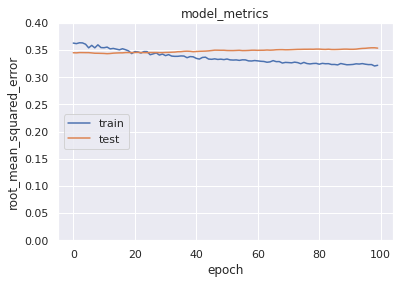

In [ ]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

#8. Memprediksi Rekomendasi




Langkah terakhir kita dapat melakukan prediksi rekomendasi.

##8.1. Menyiapkan dataframe

Kita siapkan dataframenya, disertai dengan variablenya.

In [ ]:
# Menyiapkan dataframe
place_df = df_id[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

8.1.1. jangan lupa, kita juga siapkan sample user yang dijadikan dasar perhitungan rekomendasi wisata

In [ ]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

## 8.2. Lokasi yang belum pernah dikunjungi user

Lalu, mengeluarkan hasil lokasi yang belum pernah dikunjungi user, agar user tersebut dapat mengunjungi tempat baru.

In [ ]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

##8.3. Hasil Rekomendasi User

And Finally.... Hasilnya, ML akan membuat 7 daftar rekomendasi dari beberapa user dengan wisata paling tinggi beserta dengan kategori, harga tiket masuk, dan ratingnya.

In [ ]:
# Mengambil top 7 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 7 place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

Daftar rekomendasi untuk: User 71

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Grojogan Watu Purbo Bangunrejo : Taman Hiburan
Kampung Wisata Dipowinatan : Budaya
Watu Mabur Mangunan : Cagar Alam
Pantai Jungwok : Bahari
Pantai Greweng : Bahari

------------------------------------------------------------
Top 7 place recommendation
------------------------------------------------------------
1 . Pantai Baron 
     Bahari , Harga Tiket Masuk  10000 , Rating Wisata  4.4 

2 . Pintoe Langit Dahromo 
     Cagar Alam , Harga Tiket Masuk  2500 , Rating Wisata  4.4 

3 . Pantai Indrayanti 
     Bahari , Harga Tiket Masuk  10000 , Rating Wisata  4.5 

4 . Museum Gunung Merapi 
     Budaya , Harga Tiket Masuk  10000 , Rating Wisata  4.4 

5 . Goa Pindul 
     Cagar Alam , Harga Tiket Masuk  40000 , Rating Wisata  4.5 

6 . Jogja Bay Pirates Adventure Waterpark 
     Ta

#9. Semoga rekomendasi wisata ini cocok bagi kamu yang ingin stres realease dari burn outnya kehidupan... Selamat Healing Bestieeeeee!